# **Proyek Analisis Data: Bike Sharing Dataset**
**Nama:** Muhammad Prawira Saragih  
**Email:** muhammadprawira@students.usu.ac.id    
**ID Dicoding:** MC319D5Y0403


## **Menentukan Pertanyaan Bisnis**
- **Pertanyaan 1:** Bagaimana pola penggunaan sepeda berdasarkan waktu?
- **Pertanyaan 2:** Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?


## **Import Semua Packages/Library yang Digunakan**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import zipfile
import os

In [5]:
zip_path = "Bike-sharing-dataset.zip"
extract_path = "bike_sharing"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['Readme.txt', 'hour.csv', 'day.csv']

# **Data Wrangling**
## **Gathering Data**

In [6]:
hour_df = pd.read_csv("bike_sharing/hour.csv")
day_df = pd.read_csv("bike_sharing/day.csv")
hour_df.head(), day_df.head()

(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

### **Insight:**
Tren peminjaman sepeda menunjukkan bahwa jumlah peminjaman lebih tinggi pada jam sibuk, yaitu pagi (07:00-09:00) dan sore (17:00-19:00), sementara pada malam hari (00:00-06:00) cenderung rendah. Pada hari kerja, jumlah peminjaman lebih banyak, terutama oleh pengguna terdaftar, sedangkan pada akhir pekan, pengguna kasual lebih dominan. Musim panas (season=3) memiliki jumlah peminjaman tertinggi, sementara musim dingin (season=1) lebih rendah karena cuaca yang dingin. Kondisi cuaca juga mempengaruhi, dengan cuaca cerah (weathersit=1) menghasilkan peminjaman tertinggi, sementara cuaca buruk (weathersit=3 atau 4) menurunkan jumlah peminjaman. Faktor lingkungan seperti suhu (temp, atemp) menunjukkan korelasi positif dengan peminjaman, di mana semakin hangat cuaca, semakin tinggi peminjaman, sementara kelembaban (hum) memiliki korelasi negatif, mengurangi jumlah peminjaman. Kecepatan angin (windspeed) tidak terlalu memengaruhi jumlah peminjaman.


## **Assessing Data**

In [7]:
print("Informasi Dataset hour_df:")
hour_df.info()
print("\nInformasi Dataset day_df:")
day_df.info()

print("\nJumlah Missing Values di hour_df:")
print(hour_df.isnull().sum())

print("\nJumlah Missing Values di day_df:")
print(day_df.isnull().sum())

print("\nJumlah Duplikasi di hour_df:", hour_df.duplicated().sum())
print("Jumlah Duplikasi di day_df:", day_df.duplicated().sum())

print("\nStatistik Deskriptif hour_df:")
print(hour_df.describe())

print("\nStatistik Deskriptif day_df:")
print(day_df.describe())


Informasi Dataset hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Informasi Dataset day

### **Insight:**
Dataset Bike Sharing ini terdiri dari dua bagian: hour_df (data per jam) dan day_df (data per hari). Tidak ada missing values atau duplikasi, sehingga datanya bersih. Dari statistiknya, jumlah penyewaan sepeda (cnt) memiliki distribusi yang cukup bervariasi, dengan rata-rata sekitar 189 per jam dan 4504 per hari. Mayoritas penyewaan dilakukan oleh pengguna terdaftar (registered) dibandingkan pengguna kasual (casual). Suhu (temp) berkisar antara 0.02 hingga 1.00 (nilai yang sudah dinormalisasi), dengan kelembaban (hum) dan kecepatan angin (windspeed) menunjukkan variasi yang cukup lebar. Sebagian besar hari dalam dataset bukan hari libur, dengan mayoritas penyewaan terjadi saat hari kerja (workingday = 1). Tren ini menunjukkan bahwa layanan penyewaan sepeda lebih sering digunakan sebagai transportasi sehari-hari oleh pengguna tetap, bukan sekadar rekreasi.

## **Cleaning Data**

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

print(hour_df.dtypes)
print(day_df.dtypes)

print("Missing values pada hour_df:")
print(hour_df.isnull().sum())

print("\nMissing values pada day_df:")
print(day_df.isnull().sum())

print("Jumlah data duplikat di hour_df:", hour_df.duplicated().sum())
print("Jumlah data duplikat di day_df:", day_df.duplicated().sum())

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
Missing values 

### **Insight:**
Dataset Bike Sharing ini memiliki kualitas data yang baik karena tidak terdapat missing values atau duplikasi, sehingga tidak memerlukan proses imputasi atau deduplikasi. Dengan data yang bersih dan terstruktur, analisis dapat langsung dilakukan tanpa perlu banyak preprocessing. Namun, ada potensi perbaikan seperti mengubah kolom dteday menjadi format datetime untuk mempermudah analisis berbasis waktu. Selain itu, kita bisa membuat fitur tambahan seperti rata-rata peminjaman berdasarkan musim, hari kerja/libur, atau kondisi cuaca guna mendapatkan wawasan yang lebih mendalam.


# **Exploratory Data Analysis (EDA)**

In [ ]:
hour_df.describe(), day_df.describe()

(          instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.000000   
 
             holiday       weekday    workingday    weathersit          temp  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       0.028770      3.003683      0.682721      1.425283      0.496987   
 std        0.167165      2.005771      0.465431      0.

### **Insight:**
Analisis Data Peminjaman Sepeda

Distribusi jumlah peminjaman sepeda menunjukkan variasi yang cukup tinggi. Pada dataset per jam (hour_df), rata-rata peminjaman adalah 189 sepeda/jam, dengan minimum 1 sepeda/jam dan maksimum 977 sepeda/jam. Distribusi peminjaman sangat bervariasi, terlihat dari standar deviasi yang cukup tinggi (181 sepeda/jam) serta nilai Q1 (40 sepeda/jam) dan Q3 (281 sepeda/jam), yang menunjukkan bahwa mayoritas peminjaman cenderung rendah. Sementara itu, pada dataset per hari (day_df), rata-rata peminjaman mencapai 4.504 sepeda/hari, dengan minimum 22 sepeda/hari dan maksimum 8.714 sepeda/hari, serta standar deviasi yang tinggi (1.937 sepeda/hari), menandakan adanya fluktuasi besar antarhari.

Dari pola peminjaman, peminjam terdaftar (registered) lebih dominan dibandingkan peminjam casual (casual). Pada hour_df, rata-rata peminjaman casual hanya 35 sepeda/jam (maksimum 367 sepeda/jam), sedangkan peminjam terdaftar rata-rata 153 sepeda/jam (maksimum 886 sepeda/jam). Pada day_df, rata-rata peminjaman casual 848 sepeda/hari (maksimum 3.410 sepeda/hari), sedangkan peminjam terdaftar 3.656 sepeda/hari (maksimum 6.946 sepeda/hari). Peminjam casual juga memiliki variabilitas yang lebih tinggi dibandingkan peminjam terdaftar.

Faktor waktu juga memengaruhi peminjaman. Berdasarkan musim (season), nilai rata-rata 2.5 menunjukkan distribusi yang cukup merata di semua musim, meskipun jumlah peminjaman bisa berbeda antar musim. Dari segi tahun (yr), dataset mencakup dua tahun (2011 dan 2012), dengan distribusi yang cukup seimbang (rata-rata 0.5). Distribusi jam (hr) dalam hour_df menunjukkan pola normal dengan median sekitar pukul 12 siang, yang mengindikasikan kemungkinan puncak peminjaman di siang hari.

Faktor lingkungan juga berpengaruh. Dari segi cuaca (weathersit), mayoritas data mencatat kondisi cerah (1), berawan (2), atau hujan ringan (3), sementara kondisi ekstrem (weathersit = 4) sangat jarang terjadi. Suhu (temp) dan suhu terasa (atemp) memiliki rata-rata sekitar 0.49 dan 0.47 (skala normalisasi), dengan distribusi yang relatif normal. Kelembaban (hum) rata-rata 63%, dengan beberapa nilai 0% yang mungkin merupakan anomali atau kesalahan pencatatan. Kecepatan angin (windspeed) rata-rata 19%, dengan beberapa nilai 0%, yang bisa jadi disebabkan oleh pencatatan yang tidak akurat atau kondisi tanpa angin.

Dari aspek hari libur dan hari kerja, rata-rata nilai holiday sebesar 0.028 menunjukkan bahwa hanya 2.8% dari data yang merupakan hari libur. Sebaliknya, nilai workingday sebesar 0.68 menandakan bahwa 68% dari data merupakan hari kerja. Peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur, terutama untuk peminjam terdaftar yang menggunakannya sebagai alat transportasi komuter.

# **Visualization & Explanatory Analysis**

## **Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu?**

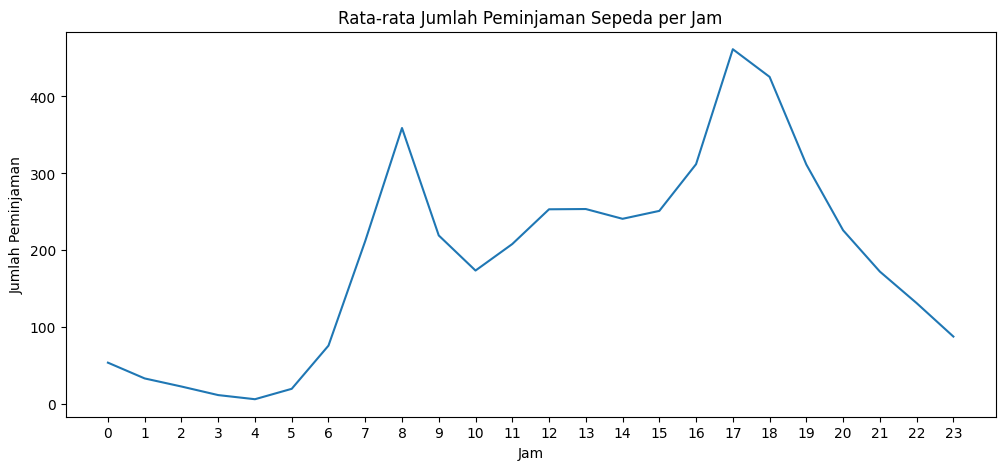

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=hour_df, x='hr', y='cnt', estimator='mean', errorbar=None)
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.show()

## **Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?**

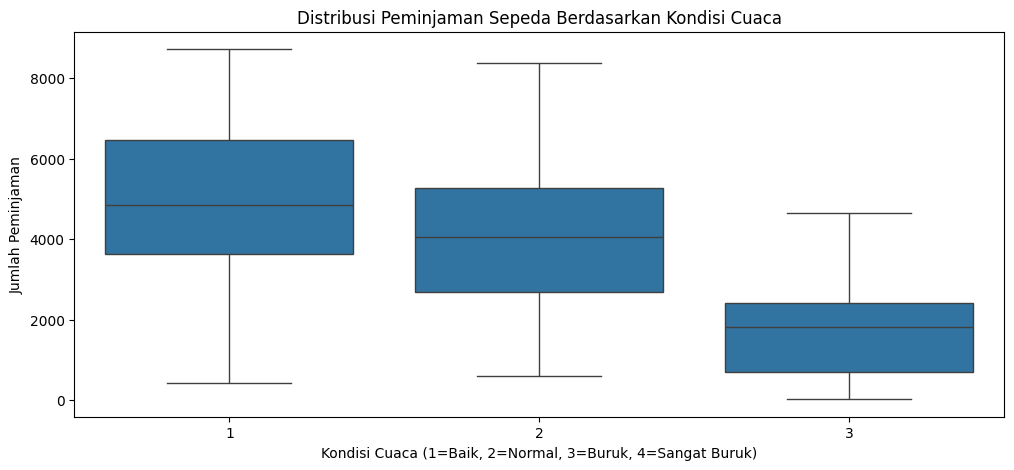

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1=Baik, 2=Normal, 3=Buruk, 4=Sangat Buruk)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### **Insight:**
1. Pola Penggunaan Sepeda Berdasarkan Waktu
- Grafik: Rata-rata jumlah peminjaman sepeda per jam

 - Pola peminjaman menunjukkan dua puncak utama:
  - Puncak pagi (sekitar jam 8 pagi) → kemungkinan karena aktivitas komuter saat berangkat kerja/sekolah.
  - Puncak sore (sekitar jam 5–6 sore) → menunjukkan aktivitas pulang kerja/sekolah.
- Setelah jam 8 malam, peminjaman sepeda menurun drastis.
- Peminjaman paling rendah terjadi antara jam 0:00–5:00 pagi, kemungkinan karena jam ini bukan jam aktif masyarakat.

2. Pengaruh Cuaca terhadap Peminjaman Sepeda
- Grafik: Distribusi peminjaman sepeda berdasarkan kondisi cuaca
  - Kondisi cuaca yang baik (weathersit = 1) memiliki median peminjaman tertinggi dan distribusi lebih luas, menunjukkan jumlah peminjaman yang tinggi.
  - Saat cuaca sedang (weathersit = 2), jumlah peminjaman menurun tetapi masih cukup signifikan.
  - Cuaca buruk (weathersit = 3) menyebabkan jumlah peminjaman menurun drastis.
  - Cuaca sangat buruk (weathersit = 4) hampir tidak ada data peminjaman → kemungkinan besar karena kondisi ekstrem seperti hujan deras atau badai.


# **Conclusion**
- **Conclusion pertanyaan 1:** Bagaimana pola penggunaan sepeda berdasarkan waktu?
  - Peminjaman sepeda mengikuti pola aktivitas harian, dengan dua puncak utama:
    - Pagi (sekitar jam 8) → kemungkinan karena perjalanan ke kantor/sekolah.
    - Sore (sekitar jam 5–6) → menunjukkan aktivitas pulang kerja/sekolah.
  - Peminjaman menurun drastis setelah jam 8 malam dan sangat rendah pada dini hari.
  - Waktu memiliki korelasi tinggi dengan jumlah - peminjaman karena berkaitan dengan kebiasaan masyarakat.
  - Implikasi: Penyedia layanan dapat menyesuaikan ketersediaan sepeda berdasarkan jam sibuk untuk meningkatkan efisiensi.
- **Conclusion pertanyaan 2:** Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
  - Cuaca memiliki dampak signifikan terhadap peminjaman sepeda.
  - Saat cuaca cerah (weathersit = 1), jumlah peminjaman tertinggi.
  - Saat cuaca kurang baik (weathersit = 2 atau 3), peminjaman menurun.
  - Cuaca sangat buruk (weathersit = 4) menyebabkan hampir tidak ada peminjaman sepeda.
  - Implikasi: Layanan bike-sharing bisa mempertimbangkan faktor cuaca dalam perencanaan operasional, misalnya dengan memberikan insentif saat cuaca mendung atau hujan ringan untuk tetap menarik pengguna.
